## Validate NSFG data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import math

import matplotlib.pyplot as plt

from empiricaldist import Cdf

import survival
import marriage

from marriage import value_counts, decorate

In [3]:
# Make the figures smaller to save some screen real estate.
# The figures generated for the book have DPI 400, so scaling
# them by a factor of 4 restores them to the size in the notebooks.
plt.rcParams['figure.dpi'] = 75
plt.rcParams['figure.figsize'] = [6, 3.5]

## Cycle 3

Note: Early cycles of the NSFG oversampled married women, so it's pretty important to correct for stratified sampling!

In [4]:
resp3 = marriage.ReadFemResp1982()
marriage.Validate1982(resp3)
resp3.shape

(7969, 25)

In [5]:
value_counts(resp3['rmarital'])

rmarital
1    3551
2     246
3      75
4     526
5     423
6    3148
Name: count, dtype: int64

In [6]:
resp3['marend01'].describe()

count    1635.000000
mean        1.386544
std         0.618812
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: marend01, dtype: float64

In [7]:
value_counts(resp3['fmarno'])

fmarno
0.0    3318
1.0    3953
2.0     612
3.0      77
4.0       5
5.0       2
8.0       2
Name: count, dtype: int64

In [8]:
resp3.fmarno.value_counts().sort_index()

fmarno
0.0    3318
1.0    3953
2.0     612
3.0      77
4.0       5
5.0       2
8.0       2
Name: count, dtype: int64

In [9]:
resp3.widowed.value_counts()

widowed
False    7850
True      119
Name: count, dtype: int64

In [10]:
sum(resp3.cmdivorcx.isnull()), 6841+29+5+56

(6932, 6931)

In [11]:
sum((resp3.cmdivorcx >= 400) & (resp3.cmdivorcx <= 948)), 583+128

(710, 711)

In [12]:
sum((resp3.cmdivorcx >= 949) & (resp3.cmdivorcx <= 1000)), 311+16

(327, 327)

In [13]:
sum(resp3.cmstphsbx.isnull()), 7571+1+6+31

(7609, 7609)

In [14]:
sum((resp3.cmstphsbx >= 400) & (resp3.cmstphsbx <= 948)), 125+33

(158, 158)

In [15]:
sum((resp3.cmstphsbx >= 949) & (resp3.cmstphsbx <= 1000)), 197+5

(202, 202)

In [16]:
sum(resp3.divorced)

1122

In [17]:
sum(~resp3.cmstphsbx.isnull())

360

In [18]:
sum(~resp3.cmdivorcx.isnull())

1037

## Cycle 4

Validating the 1988 data:

In [19]:
resp4 = marriage.ReadFemResp1988()
marriage.Validate1988(resp4)
resp4.shape

(8450, 25)

In [20]:
value_counts(resp4['rmarital'])

rmarital
1    4031
2     412
3      59
4     687
5     344
6    2917
Name: count, dtype: int64

In [21]:
value_counts(resp4['marend01'])

marend01
1.0    1553
2.0     330
3.0     108
NaN    6459
Name: count, dtype: int64

In [22]:
resp4.fmarno.describe()

count    8450.000000
mean        0.761183
std         0.711908
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: fmarno, dtype: float64

In [23]:
resp4.fmarno.value_counts().sort_index()

fmarno
0    3160
1    4325
2     829
3     108
4      15
5      13
Name: count, dtype: int64

In [24]:
resp4.evrmarry.value_counts().sort_index()

evrmarry
False    3160
True     5290
Name: count, dtype: int64

In [25]:
resp4.separated.value_counts().sort_index()

separated
False    8120
True      330
Name: count, dtype: int64

In [26]:
resp4.head()

,finalwgt,ageint,currentcm,firstcm,cmintvw,cmbirth,marend01,cmdivorcx,cmstphsbx,fmarno,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,713792,28,NaN,NaN,1061,723,NaN,NaN,NaN,0,...,False,False,4,NaN,28.166667,False,60,28.0,NaN,60
1,367022,37,NaN,NaN,1059,614,NaN,NaN,NaN,0,...,False,False,4,NaN,37.083333,False,51,37.0,NaN,50
2,975924,21,NaN,NaN,1057,796,NaN,NaN,NaN,0,...,False,False,4,NaN,21.750000,False,66,21.0,NaN,60
3,587796,39,NaN,838.0,1057,581,1.0,943.0,NaN,1,...,False,False,4,21.416667,39.666667,False,48,39.0,21.0,40
4,719633,31,974.0,882.0,1062,683,1.0,930.0,NaN,2,...,False,False,4,16.583333,31.583333,False,56,31.0,16.0,50


In [27]:
sum(resp4.cmdivorcx.isnull()), 6897+77

(6974, 6974)

In [28]:
sum((resp4.cmdivorcx >= 685) & (resp4.cmdivorcx <= 1008)), 903+152

(1055, 1055)

In [29]:
sum((resp4.cmdivorcx >= 1009) & (resp4.cmdivorcx <= 1064)), 399+22

(421, 421)

In [30]:
sum(resp4.cmstphsbx.isnull()), 8113+29

(8142, 8142)

In [31]:
sum((resp4.cmstphsbx >= 685) & (resp4.cmstphsbx <= 1008)), 75+31

(106, 106)

In [32]:
sum((resp4.cmstphsbx >= 1009) & (resp4.cmstphsbx <= 1064)), 193+9

(202, 202)

In [33]:
sum(resp4.divorced)

1553

In [34]:
sum(~resp4.cmstphsbx.isnull())

308

In [35]:
sum(~resp4.cmdivorcx.isnull())

1476

## Cycle 5

Validating the 1995 data:

In [36]:
resp5 = marriage.ReadFemResp1995()
marriage.Validate1995(resp5)
resp5.shape

(10847, 24)

In [37]:
value_counts(resp5['rmarital'])

rmarital
1    5291
2     772
3      77
4     769
5     407
6    3531
Name: count, dtype: int64

In [38]:
value_counts(resp5['fmarno'])

fmarno
0    4003
1    5562
2    1077
3     174
4      26
5       5
Name: count, dtype: int64

In [39]:
value_counts(resp5['marend01'])

marend01
1.0    2073
2.0     354
3.0     110
NaN    8310
Name: count, dtype: int64

In [40]:
resp5.head()

,cmintvw,timesmar,cmmarrhx,cmbirth,finalwgt,marend01,cmdivorcx,cmstphsbx,marstat,fmarno,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,1149,NaN,NaN,837,6776.3796,NaN,NaN,NaN,5,0,...,False,False,5,NaN,26.000000,False,69,26.0,NaN,60
1,1142,1.0,1024.0,781,841.8221,2.0,NaN,NaN,4,1,...,False,False,5,20.250000,30.083333,False,65,30.0,20.0,60
2,1145,NaN,NaN,907,3617.3637,NaN,NaN,NaN,5,0,...,False,False,5,NaN,19.833333,False,75,19.0,NaN,70
3,1145,1.0,1133.0,771,10788.1271,2.0,NaN,NaN,4,1,...,False,False,5,30.166667,31.166667,False,64,31.0,30.0,60
4,1144,NaN,NaN,927,5359.4150,NaN,NaN,NaN,5,0,...,False,False,5,NaN,18.083333,False,77,18.0,NaN,70


In [41]:
sum(resp5.cmdivorcx.isnull()), 9601+1+1+22

(9625, 9625)

In [42]:
sum((resp5.cmdivorcx >= 780) & (resp5.cmdivorcx <= 1092)), 1116

(1116, 1116)

In [43]:
sum((resp5.cmdivorcx >= 1093) & (resp5.cmdivorcx <= 1150)), 106

(106, 106)

In [44]:
sum(resp5.cmstphsbx.isnull()), 9601+1+15

(9617, 9617)

In [45]:
sum((resp5.cmstphsbx >= 780) & (resp5.cmstphsbx <= 1092)), 1167

(1167, 1167)

In [46]:
sum((resp5.cmstphsbx >= 1093) & (resp5.cmstphsbx <= 1150)), 63

(63, 63)

In [47]:
resp5.marend01.value_counts().sort_index()

marend01
1.0    2073
2.0     354
3.0     110
Name: count, dtype: int64

In [48]:
sum(resp5.divorced)

2073

In [49]:
sum(~resp5.cmstphsbx.isnull())

1230

In [50]:
sum(~resp5.cmdivorcx.isnull())

1222

In [51]:
sum((resp5.marend01==2) & (resp5.cmdivorcx.isnull()))

354

In [52]:
sum((resp5.marend01==3) & (resp5.cmdivorcx.isnull()))

110

In [53]:
sum((~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

0

In [54]:
resp5.marstat.value_counts().sort_index()

marstat
1    5291
2      93
3    1008
4     452
5    4003
Name: count, dtype: int64

In [55]:
sum((resp5.marstat==4) & (~resp5.divorced))   # separated and not divorced

360

In [56]:
sum((resp5.marstat==4) & (~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

0

## Cycle 6

Validating the 2002 data:

In [57]:
resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)
resp6.shape

(7643, 26)

In [58]:
value_counts(resp6['rmarital'])

rmarital
1    3080
2     732
3      49
4     557
5     279
6    2946
Name: count, dtype: int64

In [59]:
resp6.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,parity,rmarital,fmarno,mardat01,mardis01,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,2298,902,False,NaN,NaN,4,2,0,NaN,NaN,...,False,False,6,NaN,27.666667,False,75,27.0,NaN,70
1,5012,718,True,974.0,1077.0,1,1,2,974.0,1077.0,...,False,False,6,21.333333,42.916667,False,59,42.0,21.0,50
2,11586,708,True,910.0,938.0,1,4,1,910.0,921.0,...,False,False,6,16.833333,43.833333,False,58,43.0,16.0,50
3,6794,1042,False,NaN,NaN,0,6,0,NaN,NaN,...,False,False,6,NaN,16.000000,False,86,16.0,NaN,80
4,616,991,False,NaN,NaN,0,6,0,NaN,NaN,...,False,False,6,NaN,20.166667,False,82,20.0,NaN,80


In [60]:
sum(resp6.cmdivorcx.isnull()), 6639+2+20

(6661, 6661)

In [61]:
sum((resp6.cmdivorcx >= 301) & (resp6.cmdivorcx <= 1164)), 607

(607, 607)

In [62]:
sum((resp6.cmdivorcx >= 1165) & (resp6.cmdivorcx <= 1239)), 375

(375, 375)

In [63]:
resp6.marend01.value_counts().sort_index()

marend01
1.0    1232
2.0     260
3.0      58
Name: count, dtype: int64

In [64]:
sum(resp6.divorced), sum(resp6.loc[resp6.divorced, 'mar1diss'].isnull())

(1232, 0)

In [65]:
sum(resp6.separated), sum(resp6.loc[resp6.separated, 'mar1diss'].isnull())

(260, 0)

In [66]:
sum(resp6.widowed), sum(resp6.loc[resp6.widowed, 'mar1diss'].isnull())

(58, 0)

In [67]:
sum(resp6.stillma), sum(resp6.loc[resp6.stillma, 'mar1diss'].isnull())

(2576, 0)

In [68]:
sum(resp6.evrmarry), 1232+260+58+2576

(4126, 4126)

## Cycle 7

Validating the 2010 data:

In [69]:
resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)
resp7.shape

(12279, 26)

In [70]:
resp7.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,34156,799,False,NaN,NaN,6,0,0,NaN,NaN,...,False,False,7,NaN,43.666667,False,66,43.0,NaN,60
1,40081,925,True,1314.0,NaN,1,0,1,1314.0,NaN,...,False,True,7,32.416667,33.166667,False,77,33.0,32.0,70
2,32817,958,False,NaN,NaN,6,0,0,NaN,NaN,...,False,False,7,NaN,27.416667,False,79,27.0,NaN,70
3,39968,869,False,NaN,NaN,6,0,0,NaN,NaN,...,False,False,7,NaN,37.833333,False,72,37.0,NaN,70
4,27121,1004,False,NaN,NaN,6,0,0,NaN,NaN,...,False,False,7,NaN,23.416667,False,83,23.0,NaN,80


In [71]:
sum(resp7.cmdivorcx.isnull()), 10705+1+19

(10730, 10725)

In [72]:
sum((resp7.cmdivorcx >= 522) & (resp7.cmdivorcx <= 1278)), 1286

(1281, 1286)

In [73]:
sum((resp7.cmdivorcx >= 1279) & (resp7.cmdivorcx <= 1290)), 106

(106, 106)

In [74]:
sum((resp7.cmdivorcx >= 1291) & (resp7.cmdivorcx <= 1308)), 112

(112, 112)

In [75]:
sum((resp7.cmdivorcx >= 1309) & (resp7.cmdivorcx <= 1326)), 50

(50, 50)

In [76]:
resp7.marend01.value_counts().sort_index()

marend01
1.0    1574
2.0     405
3.0      68
Name: count, dtype: int64

In [77]:
sum(resp7.divorced), sum(resp7.loc[resp7.divorced, 'mar1diss'].isnull())

(1574, 0)

In [78]:
sum(resp7.separated), sum(resp7.loc[resp7.separated, 'mar1diss'].isnull())

(405, 0)

In [79]:
sum(resp7.widowed), sum(resp7.loc[resp7.widowed, 'mar1diss'].isnull())

(68, 0)

In [80]:
sum(resp7.stillma), sum(resp7.loc[resp7.stillma, 'mar1diss'].isnull())

(3487, 0)

In [81]:
sum(resp7.evrmarry), 1574+405+68+3487

(5534, 5534)

## Validating the 2013 data

In [82]:
resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)
resp8.shape

(5601, 26)

In [83]:
resp8.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,50002,922,True,1303.0,NaN,5,1,1,1303.0,1353.0,...,False,False,8,31.750000,36.250000,False,76,36.0,31.0,70
1,50004,986,True,1215.0,1243.0,5,0,2,1215.0,1219.0,...,False,False,8,19.083333,29.750000,False,82,29.0,19.0,80
2,50005,1001,False,NaN,NaN,2,1,0,NaN,NaN,...,False,False,8,NaN,30.000000,False,83,30.0,NaN,80
3,50008,834,False,NaN,NaN,6,3,0,NaN,NaN,...,False,False,8,NaN,43.333333,False,69,43.0,NaN,60
4,50013,1127,False,NaN,NaN,6,0,0,NaN,NaN,...,False,False,8,NaN,19.750000,False,93,19.0,NaN,90


In [84]:
sum(resp8.cmdivorcx.isnull()), 4851+2+24

(4877, 4877)

In [85]:
sum((resp8.cmdivorcx >= 380) & (resp8.cmdivorcx <= 1340)), 658

(658, 658)

In [86]:
sum((resp8.cmdivorcx >= 1341) & (resp8.cmdivorcx <= 1352)), 48

(48, 48)

In [87]:
sum((resp8.cmdivorcx >= 1353) & (resp8.cmdivorcx <= 1365)), 18

(18, 18)

In [88]:
resp8.marend01.value_counts().sort_index()

marend01
1.0    755
2.0    214
3.0     26
Name: count, dtype: int64

In [89]:
sum(resp8.divorced), sum(resp8.loc[resp8.divorced, 'mar1diss'].isnull())

(755, 0)

In [90]:
sum(resp8.separated), sum(resp8.loc[resp8.separated, 'mar1diss'].isnull())

(214, 0)

In [91]:
sum(resp8.widowed), sum(resp8.loc[resp8.widowed, 'mar1diss'].isnull())

(26, 0)

In [92]:
sum(resp8.stillma), sum(resp8.loc[resp8.stillma, 'mar1diss'].isnull())

(1457, 0)

In [93]:
sum(resp8.evrmarry), 755+214+26+1457

(2452, 2452)

## Validating the 2015 data

In [94]:
resp9 = marriage.ReadFemResp2015()
marriage.Validate2015(resp9)
resp9.shape

(5699, 26)

In [95]:
resp9.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,60418,921,True,1159.0,1269.0,2,3,1,1159.0,1258.0,...,False,False,9,19.833333,38.333333,False,76,38.0,19.0,70
1,60419,942,True,1207.0,1253.0,2,0,1,1207.0,1253.0,...,False,False,9,22.083333,37.166667,False,78,37.0,22.0,70
2,60420,981,False,NaN,NaN,6,1,0,NaN,NaN,...,False,False,9,NaN,33.916667,False,81,33.0,NaN,80
3,60423,1010,False,NaN,NaN,6,2,0,NaN,NaN,...,False,False,9,NaN,31.416667,False,84,31.0,NaN,80
4,60426,897,True,1256.0,NaN,1,1,1,1256.0,NaN,...,False,True,9,29.916667,39.250000,False,74,39.0,29.0,70


In [96]:
sum(resp9.cmdivorcx.isnull()), 4946+3+18

(4967, 4967)

In [97]:
sum((resp9.cmdivorcx >= 378) & (resp9.cmdivorcx <= 1340)), 563

(563, 563)

In [98]:
sum((resp9.cmdivorcx >= 1341) & (resp9.cmdivorcx <= 1352)), 56

(56, 56)

In [99]:
sum((resp9.cmdivorcx >= 1353) & (resp9.cmdivorcx <= 1364)), 48

(48, 48)

In [100]:
sum((resp9.cmdivorcx >= 1365) & (resp9.cmdivorcx <= 1376)), 46

(46, 46)

In [101]:
sum((resp9.cmdivorcx >= 1377) & (resp9.cmdivorcx <= 1389)), 19

(19, 19)

In [102]:
resp9.marend01.value_counts().sort_index()

marend01
1.0    756
2.0    169
3.0     28
Name: count, dtype: int64

In [103]:
sum(resp9.divorced), sum(resp9.loc[resp9.divorced, 'mar1diss'].isnull())

(756, 0)

In [104]:
sum(resp9.separated), sum(resp9.loc[resp9.separated, 'mar1diss'].isnull())

(169, 0)

In [105]:
sum(resp9.widowed), sum(resp9.loc[resp9.widowed, 'mar1diss'].isnull())

(28, 0)

In [106]:
sum(resp9.stillma), sum(resp9.loc[resp9.stillma, 'mar1diss'].isnull())

(1448, 0)

In [107]:
sum(resp9.evrmarry), 756+169+28+1448

(2401, 2401)

## Validating 2017 data

In [108]:
resp10 = marriage.ReadFemResp2017()
marriage.Validate2017(resp10)

In [109]:
value_counts(resp10['marend01'])

marend01
1.0     818
2.0     166
3.0      55
NaN    4515
Name: count, dtype: int64

In [110]:
resp10['cmdivorcx'].describe()

count     818.000000
mean     1255.334963
std        93.168345
min       978.000000
25%      1182.000000
50%      1278.000000
75%      1338.000000
max      1410.000000
Name: cmdivorcx, dtype: float64

In [111]:
resp10.shape

(5554, 25)

In [112]:
sum(resp10.evrmarry)

2582

In [113]:
resp10.agemarry.value_counts().max()

29

In [114]:
resp10.head()

,caseid,evrmarry,ager,rmarital,parity,fmarno,mardat01,mardis01,marend01,finalwgt,...,cmbirth,cmmarrhx,cmdivorcx,cycle,agemarry,missing,year,age_index,agemarry_index,birth_index
0,70623,False,16,6,0,0,NaN,NaN,NaN,3631.827872,...,1204,NaN,NaN,10,NaN,False,100,16.0,NaN,100
1,70624,True,40,4,0,1,2004.0,2007.0,1.0,18827.876206,...,920,1254.0,1290.0,10,27.833333,False,76,40.0,27.0,70
2,70625,False,15,6,0,0,NaN,NaN,NaN,3354.443830,...,1228,NaN,NaN,10,NaN,False,102,15.0,NaN,100
3,70627,True,35,1,2,1,2008.0,NaN,NaN,19877.457610,...,980,1302.0,NaN,10,26.833333,False,81,35.0,26.0,80
4,70628,True,28,1,3,1,2010.0,NaN,NaN,4221.017695,...,1079,1326.0,NaN,10,20.583333,False,89,28.0,20.0,80


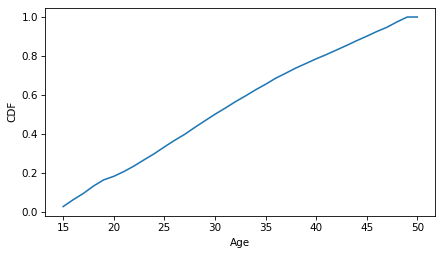

In [115]:
Cdf.from_seq(resp10.ager).plot()
decorate(xlabel='Age', ylabel='CDF')

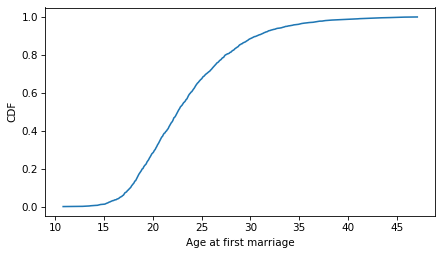

In [116]:
Cdf.from_seq(resp10.agemarry).plot()
decorate(xlabel='Age at first marriage', ylabel='CDF')

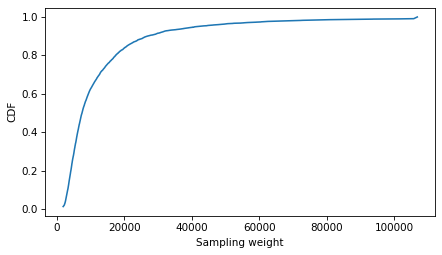

In [117]:
Cdf.from_seq(resp10.finalwgt).plot()
decorate(xlabel='Sampling weight', ylabel='CDF')

## Validating 2019 data

In [118]:
resp11 = marriage.ReadFemResp2019()
marriage.Validate2019(resp11)
resp11.shape

(6141, 25)

In [119]:
value_counts(resp11['marend01'])

marend01
1.0     873
2.0     177
3.0      45
NaN    5046
Name: count, dtype: int64

In [120]:
resp11['cmdivorcx'].describe()

count     873.000000
mean     1281.587629
std        88.792793
min      1002.000000
25%      1218.000000
50%      1290.000000
75%      1350.000000
max      1434.000000
Name: cmdivorcx, dtype: float64

In [121]:
sum(resp11.evrmarry)

2722

In [122]:
resp11.agemarry.value_counts().max()

29

In [123]:
resp11.head()

,caseid,evrmarry,ager,rmarital,parity,fmarno,mardat01,mardis01,marend01,finalwgt,...,cmbirth,cmmarrhx,cmdivorcx,cycle,agemarry,missing,year,age_index,agemarry_index,birth_index
0,80716,False,35,6,0,0,NaN,NaN,NaN,4472.687899,...,1016,NaN,NaN,11,NaN,False,84,35.0,NaN,80
1,80718,False,30,6,0,0,NaN,NaN,NaN,25114.995443,...,1059,NaN,NaN,11,NaN,False,88,30.0,NaN,80
2,80719,False,30,6,5,0,NaN,NaN,NaN,1340.862000,...,1071,NaN,NaN,11,NaN,False,89,30.0,NaN,80
3,80720,True,32,1,2,1,2010.0,NaN,NaN,7092.581524,...,1055,1326.0,NaN,11,22.583333,False,87,32.0,22.0,80
4,80723,True,27,4,3,1,2011.0,2016.0,1.0,9607.322007,...,1104,1338.0,1398.0,11,19.500000,False,91,27.0,19.0,90


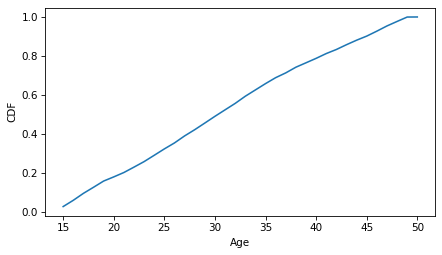

In [124]:
Cdf.from_seq(resp11.ager).plot()
decorate(xlabel='Age', ylabel='CDF')

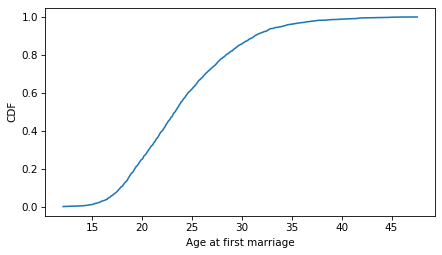

In [125]:
Cdf.from_seq(resp11.agemarry).plot()
decorate(xlabel='Age at first marriage', ylabel='CDF')

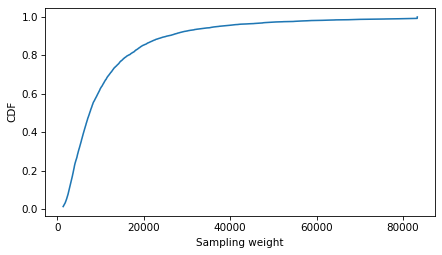

In [126]:
Cdf.from_seq(resp11.finalwgt).plot()
decorate(xlabel='Sampling weight', ylabel='CDF')

## Validating 2023 data


In [127]:
usecols = [
        "caseid",
        "cmintvw",
        "ager",
        "evrmarry",
        "parity",
        "wgt2022_2023",
        "mardat01",
        "marend01",  # how first marriage ended
        "mardis01",  # year of first marriage dissolution
        "rmarital",  # marital status
        "fmarno",  # number of formal marriages
    ]

usecols_upper = [col.upper() for col in usecols]

In [128]:
import pyreadstat

# Path to your SAS file
file_path = "NSFG-2022-2023-FemRespPUFData.sas7bdat"

# Read the SAS file into a pandas DataFrame
resp12, meta = pyreadstat.read_sas7bdat(file_path, usecols=usecols_upper)
resp12.columns = resp12.columns.str.lower()

# Display the DataFrame
resp12.head()

,evrmarry,ager,rmarital,parity,fmarno,mardat01,marend01,mardis01,wgt2022_2023,cmintvw
0,0.0,20.0,6.0,1.0,0.0,NaN,NaN,NaN,25188.037988,1468.0
1,1.0,48.0,1.0,2.0,1.0,1998.0,NaN,NaN,44976.081338,1466.0
2,1.0,39.0,1.0,3.0,1.0,2009.0,NaN,NaN,24268.304357,1466.0
3,1.0,41.0,1.0,0.0,1.0,2020.0,NaN,NaN,19018.908187,1466.0
4,1.0,48.0,1.0,1.0,2.0,1992.0,1.0,1996.0,13580.257744,1466.0


In [129]:
for col in resp12.columns:
    if 'wgt' in col:
        print(col)

wgt2022_2023


In [130]:
resp12['evrmarry'].value_counts()

evrmarry
0.0    3024
1.0    2562
Name: count, dtype: int64

In [131]:
resp12['marend01'].value_counts()

marend01
1.0    631
2.0     85
3.0     27
Name: count, dtype: int64

In [132]:
resp12['fmarno'].value_counts()

fmarno
0.0    3024
1.0    2237
2.0     274
3.0      45
4.0       4
5.0       2
Name: count, dtype: int64

In [133]:
resp12['fmarno'].value_counts()

fmarno
0.0    3024
1.0    2237
2.0     274
3.0      45
4.0       4
5.0       2
Name: count, dtype: int64

In [134]:
resp12['ager'].value_counts()

ager
32.0    227
33.0    217
30.0    206
31.0    198
35.0    190
38.0    189
37.0    189
29.0    183
41.0    181
39.0    180
34.0    180
36.0    180
40.0    178
27.0    176
18.0    170
19.0    162
28.0    160
42.0    152
43.0    152
25.0    147
45.0    145
17.0    142
49.0    140
47.0    138
26.0    137
48.0    135
44.0    135
46.0    134
15.0    132
20.0    127
24.0    126
16.0    124
22.0    124
23.0    116
21.0    113
50.0      1
Name: count, dtype: int64

In [135]:
resp12['mardat01'].value_counts()

mardat01
2016.0    145
2013.0    130
2014.0    127
2010.0    126
2012.0    125
2019.0    119
2008.0    116
2015.0    115
2017.0    114
2009.0    110
2020.0    110
2021.0    108
2007.0    104
2018.0     99
2011.0     90
2022.0     87
2006.0     82
2005.0     81
2004.0     67
2003.0     61
2001.0     58
1999.0     51
2002.0     51
2000.0     48
1998.0     42
1996.0     31
1997.0     30
1994.0     24
1993.0     22
2023.0     22
9997.0     21
1995.0     20
1992.0     14
1991.0      9
1990.0      3
Name: count, dtype: int64

In [136]:
resp12['mardis01'].value_counts()

mardis01
2019.0    49
2018.0    47
2016.0    46
2011.0    36
2022.0    35
2014.0    34
2020.0    34
2009.0    34
2010.0    33
2012.0    32
2015.0    31
2021.0    30
2017.0    28
2013.0    27
2008.0    24
2004.0    23
2005.0    21
2007.0    20
2001.0    20
2000.0    19
2003.0    18
1999.0    16
2006.0    14
1998.0    11
1997.0    11
2023.0    11
2002.0    11
1996.0     8
1994.0     5
1993.0     4
9997.0     4
1995.0     4
1992.0     2
1990.0     1
Name: count, dtype: int64

In [137]:
from marriage import digitize_resp

def clean_fem_resp_2023(df):
    df['mardat01'] = df['mardat01'].replace(9997, np.nan)
    
    df["evrmarry"] = df.evrmarry == 1
    df["divorced"] = df.marend01 == 1
    df["separated"] = df.marend01 == 2
    df["widowed"] = df.marend01 == 3
    df["stillma"] = (df.fmarno == 1) & (df.rmarital == 1)

    # since cmbirth and cmmarrhx are no longer included,
    # we have to compute them based on other variables;
    # the result can be off by up to 6 months in either direction
    df["cmbirth"] = df.cmintvw - df.ager * 12 + 6
    df["cmmarrhx"] = (df.mardat01 - 1900) * 12 + 6
    df["cmdivorcx"] = np.nan
    df.loc[df["divorced"], "cmdivorcx"] = (df.mardis01 - 1900) * 12 + 6

    df = df.rename(columns={"wgt2022_2023": "finalwgt"})
    df["cycle"] = 12

    df["agemarry"] = (df.cmmarrhx - df.cmbirth) / 12.0

    # if married, we need agemarry; if not married, we need age
    df["missing"] = np.where(df.evrmarry, df.agemarry.isnull(), df.ager.isnull())
    
    month0 = pd.to_datetime("1899-12-15")
    dates = [month0 + pd.DateOffset(months=cm) for cm in df.cmbirth]
    df["year"] = pd.DatetimeIndex(dates).year - 1900

    digitize_resp(df)

    return df

In [138]:
resp12 = clean_fem_resp_2023(resp12)
resp12.columns

Index(['evrmarry', 'ager', 'rmarital', 'parity', 'fmarno', 'mardat01',
       'marend01', 'mardis01', 'finalwgt', 'cmintvw', 'divorced', 'separated',
       'widowed', 'stillma', 'cmbirth', 'cmmarrhx', 'cmdivorcx', 'cycle',
       'agemarry', 'missing', 'year', 'age_index', 'agemarry_index',
       'birth_index'],
      dtype='object')

In [139]:
value_counts(resp12['marend01'])

marend01
1.0     631
2.0      85
3.0      27
NaN    4843
Name: count, dtype: int64

In [140]:
resp12['cmdivorcx'].describe()

count      631.000000
mean      1788.123613
std       6598.278385
min       1086.000000
25%       1266.000000
50%       1350.000000
75%       1410.000000
max      97170.000000
Name: cmdivorcx, dtype: float64

In [141]:
sum(resp12.evrmarry)

2562

In [142]:
resp12.agemarry.value_counts().max()

41

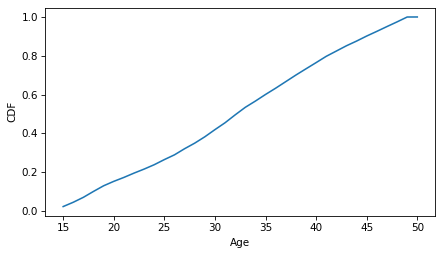

In [143]:
Cdf.from_seq(resp12.ager).plot()
decorate(xlabel='Age', ylabel='CDF')

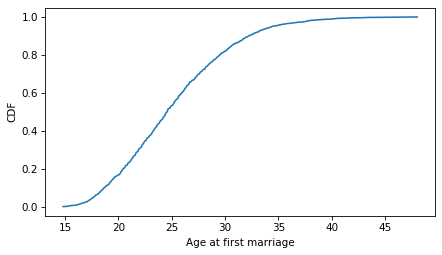

In [144]:
Cdf.from_seq(resp12.agemarry).plot()
decorate(xlabel='Age at first marriage', ylabel='CDF')

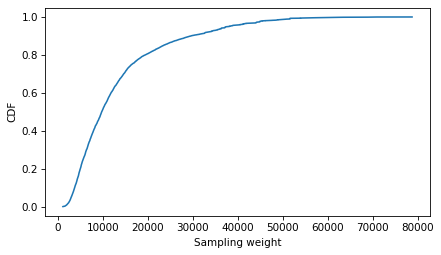

In [145]:
Cdf.from_seq(resp12.finalwgt).plot()
decorate(xlabel='Sampling weight', ylabel='CDF')

## Concatenate the data

Make a list of DataFrames, one for each cycle:

In [146]:
resps = [resp12, resp11, resp10, resp9, resp8, resp7, resp6, resp5, resp4, resp3]
#resps = [resp11]

Make a table showing the number of respondents in each cycle:

In [147]:
def SummarizeCycle(df):
    ages = df.ager.min(), df.ager.max()
    ages = np.array(ages)
    
    intvws = df.cmintvw.min(), df.cmintvw.max()
    intvws = np.array(intvws) / 12 + 1900
    
    births = df.cmbirth.min(), df.cmbirth.max()
    births = np.array(births) / 12 + 1900

    print('# & ', intvws.astype(int), '&', len(df), '&', births.astype(int), r'\\')
    
for resp in reversed(resps):
    SummarizeCycle(resp)

# &  [1982 1983] & 7969 & [1937 1968] \\
# &  [1988 1988] & 8450 & [1943 1973] \\
# &  [1995 1995] & 10847 & [1950 1980] \\
# &  [2002 2003] & 7643 & [1957 1988] \\
# &  [2006 2010] & 12279 & [1961 1995] \\
# &  [2011 2013] & 5601 & [1966 1998] \\
# &  [2013 2015] & 5699 & [1968 2000] \\
# &  [2015 2017] & 5554 & [1966 2003] \\
# &  [2017 2019] & 6141 & [1969 2005] \\
# &  [2022 2024] & 5586 & [1973 2009] \\


Check for missing values in `agemarry`:

In [148]:
def CheckAgeVars(df):
    print(sum(df[df.evrmarry].agemarry.isnull()))
    
for resp in resps:
    CheckAgeVars(resp)

21
0
0
11
17
16
37
0
22
0


Combine the DataFrames (but remember that this is not resampled properly):

In [149]:
df = pd.concat(resps, ignore_index=True, sort=False)
len(df)

75769

```
1 CURRENTLY MARRIED 3971
2 NOT MARRIED BUT LIVING WITH OPP SEX PARTNER 1451
3 WIDOWED 43
4 DIVORCED 786
5 SEPARATED FOR REASONS OF MARITAL DISCORD 431
6 NEVER BEEN MARRIED 5597
```

In [150]:
pd.crosstab(df['rmarital'], df['cycle'], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
rmarital,,,,,,,,,,
1.0,3551,4031,5291,3080,3971,1711,1699,1828,1913,2060
2.0,246,412,772,732,1451,763,810,631,754,627
3.0,75,59,77,49,43,21,14,37,33,24
4.0,526,687,769,557,786,355,319,397,410,283
5.0,423,344,407,279,431,218,183,187,200,94
6.0,3148,2917,3531,2946,5597,2533,2674,2474,2831,2498


In [151]:
pd.crosstab(df['fmarno'], df['cycle'], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
fmarno,,,,,,,,,,
0.0,3318,3160,4003,3517,6745,3149,3298,2972,3419,3024
1.0,3953,4325,5562,3436,4788,2076,2037,2156,2293,2237
2.0,612,829,1077,582,631,332,317,357,356,274
3.0,77,108,174,90,103,34,37,55,61,45
4.0,5,15,26,15,8,9,9,10,12,4
5.0,2,13,5,3,3,1,1,2,0,2
6.0,0,0,0,0,1,0,0,2,0,0
8.0,2,0,0,0,0,0,0,0,0,0


In [152]:
pd.crosstab(df['evrmarry'], df['cycle'])

cycle,3,4,5,6,7,8,9,10,11,12
evrmarry,,,,,,,,,,
False,3318,3160,4006,3517,6745,3149,3298,2972,3419,3024
True,4651,5290,6841,4126,5534,2452,2401,2582,2722,2562


In [153]:
pd.crosstab(df['marend01'], df['cycle'])

cycle,3,4,5,6,7,8,9,10,11,12
marend01,,,,,,,,,,
1.0,1122,1553,2073,1232,1574,755,756,818,873,631
2.0,394,330,354,260,405,214,169,166,177,85
3.0,119,108,110,58,68,26,28,55,45,27


In [154]:
df.groupby('cycle')['ager'].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,27.708454,8.181847,15.000000,20.250000,27.000000,34.000000,45.000000
4,8450.0,30.035089,8.130994,14.916667,23.416667,30.250000,36.666667,45.250000
5,10847.0,31.090686,8.303936,14.833333,24.333333,31.916667,38.000000,45.500000
6,7643.0,30.001592,8.433760,15.000000,22.833333,30.000000,37.166667,45.000000
7,12279.0,29.136622,8.451631,15.000000,21.916667,28.666667,36.166667,45.083333
8,5601.0,29.104133,8.375936,15.000000,21.916667,28.833333,35.916667,45.083333
9,5699.0,29.379423,8.405552,15.000000,22.416667,29.166667,36.083333,45.166667
10,5554.0,31.016745,9.886329,15.000000,23.000000,30.000000,39.000000,50.000000
11,6141.0,31.147044,9.749085,15.000000,23.000000,31.000000,39.000000,50.000000


In [155]:
df.groupby('cycle')['cmmarrhx'].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,4651.0,857.943883,83.893561,626.0,800.00,863.0,927.0,997.0
4,5268.0,911.531131,84.646230,685.0,845.00,915.0,981.0,1062.0
5,6844.0,993.719608,85.862666,780.0,924.00,997.0,1066.0,1149.0
6,4089.0,1102.219124,84.454045,871.0,1042.00,1110.0,1173.0,1236.0
7,5520.0,1174.797826,82.526545,920.0,1115.75,1183.0,1243.0,1324.0
8,2435.0,1226.575359,78.826596,999.0,1175.00,1232.0,1291.0,1363.0
9,2390.0,1249.898745,78.903270,1026.0,1195.00,1256.0,1316.0,1388.0
10,2582.0,1246.838110,100.573347,966.0,1170.00,1254.0,1326.0,1410.0
11,2722.0,1273.238795,97.275836,990.0,1206.00,1290.0,1350.0,1434.0


In [156]:
df.groupby('cycle')['cmintvw'].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,994.452252,1.416700,992.0,993.0,994.0,995.0,1000.0
4,8450.0,1059.450888,1.548602,1057.0,1058.0,1059.0,1060.0,1064.0
5,10847.0,1143.968471,2.024495,1141.0,1142.0,1143.0,1145.0,1150.0
6,7643.0,1232.783200,2.978545,1225.0,1231.0,1233.0,1235.0,1239.0
7,12279.0,1302.753644,14.213140,1278.0,1290.0,1303.0,1315.0,1326.0
8,5601.0,1352.992144,6.762999,1341.0,1347.0,1353.0,1359.0,1365.0
9,5699.0,1377.168451,6.864101,1365.0,1372.0,1377.0,1383.0,1389.0
10,5554.0,1400.902413,6.971852,1389.0,1395.0,1401.0,1407.0,1413.0
11,6141.0,1424.813223,7.065362,1413.0,1419.0,1425.0,1431.0,1437.0


In [157]:
df.groupby('cycle')['cmbirth'].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,661.950809,98.310000,453.0,586.00,671.0,753.0,817.0
4,8450.0,699.029822,97.634489,519.0,620.00,697.0,778.0,879.0
5,10847.0,770.880243,99.639469,604.0,688.00,762.0,852.0,963.0
6,7643.0,872.764098,101.161818,688.0,787.00,873.0,959.5,1058.0
7,12279.0,953.114179,102.338992,740.0,869.00,959.0,1040.0,1143.0
8,5601.0,1003.742546,100.504478,803.0,923.00,1008.0,1090.0,1182.0
9,5699.0,1024.615371,101.047116,826.0,944.00,1027.0,1108.5,1206.0
10,5554.0,1034.701476,118.986717,802.0,940.00,1041.0,1132.0,1239.0
11,6141.0,1057.048689,117.232379,831.0,964.00,1062.0,1152.0,1262.0


In [158]:
df.groupby('cycle')['cmdivorcx'].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,1037.0,906.558341,64.808894,654.0,870.00,919.0,957.00,994.0
4,1476.0,958.396341,69.049867,718.0,915.00,967.0,1014.00,1061.0
5,1222.0,999.819149,68.071306,791.0,949.00,1001.0,1052.00,1141.0
6,982.0,1123.318737,77.818952,909.0,1066.25,1137.0,1190.00,1237.0
7,1549.0,1201.541640,76.631331,960.0,1152.00,1213.0,1265.00,1325.0
8,724.0,1254.817680,72.821595,1038.0,1205.00,1267.0,1316.25,1363.0
9,732.0,1281.019126,70.487590,1063.0,1236.00,1295.0,1338.00,1387.0
10,818.0,1255.334963,93.168345,978.0,1182.00,1278.0,1338.00,1410.0
11,873.0,1281.587629,88.792793,1002.0,1218.00,1290.0,1350.00,1434.0


Double check missing data:

In [159]:
sum(df.missing)

124

Generate a table with the number of respondents in each cohort:

In [160]:
marriage.digitize_resp(df)
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    print(name, '&', len(group), '&', int(group.ager.min()), '--', int(group.age_index.max()),
                '&', len(group[group.evrmarry]), '&', sum(group.missing), r'\\')

30 & 325 & 42 -- 45 & 310 & 0 \\
40 & 3608 & 32 -- 45 & 3287 & 9 \\
50 & 10631 & 22 -- 45 & 8667 & 18 \\
60 & 14953 & 15 -- 50 & 8809 & 33 \\
70 & 17234 & 14 -- 50 & 9747 & 40 \\
80 & 16040 & 14 -- 44 & 6577 & 21 \\
90 & 10324 & 15 -- 34 & 1711 & 2 \\
100 & 2654 & 15 -- 24 & 53 & 1 \\


## Generate extracts

In [161]:
df.to_hdf('FemMarriageData.hdf', key='FemMarriageData')

In [162]:
%time nsfg_female = pd.read_hdf('FemMarriageData.hdf', 'FemMarriageData')

CPU times: user 18.2 ms, sys: 7.75 ms, total: 25.9 ms
Wall time: 25.5 ms


In [163]:
df.to_csv('marriage_nsfg_female.csv.gz', index=False, compression='gzip')

In [164]:
!ls -lh marriage_nsfg_female.csv.gz

-rw-rw-r-- 1 downey downey 1.9M Dec 11 10:26 marriage_nsfg_female.csv.gz


## Male data

In [165]:
male2019 = marriage.ReadMaleResp2019()
male2019.head()

,caseid,evrmarry,ager,rmarital,fmarno,mardat01,marend01,mar1diss,finalwgt,cmintvw,...,separated,widowed,stillma,cycle,agemarry,missing,year,age_index,agemarry_index,birth_index
0,80717,False,31.0,2,0,NaN,NaN,NaN,11403.609947,1423,...,False,False,False,11,NaN,False,87,31.0,NaN,80
1,80721,False,17.0,6,0,NaN,NaN,NaN,12669.986089,1421,...,False,False,False,11,NaN,False,101,17.0,NaN,100
2,80722,False,16.0,6,0,NaN,NaN,NaN,4318.981209,1430,...,False,False,False,11,NaN,False,103,16.0,NaN,100
3,80724,True,49.0,4,2,2013.0,1.0,2.0,3872.331010,1433,...,False,False,False,11,42.583333,False,70,49.0,42.0,70
4,80732,False,39.0,6,0,NaN,NaN,NaN,6390.223031,1433,...,False,False,False,11,NaN,False,80,39.0,NaN,80


In [166]:
male2019.agemarry.describe()

count    1961.000000
mean       25.952490
std         5.470129
min        12.500000
25%        21.833333
50%        25.166667
75%        28.916667
max        45.833333
Name: agemarry, dtype: float64

In [167]:
male2019.ager.describe()

count    5206.000000
mean       30.547445
std        10.012382
min        15.000000
25%        22.000000
50%        30.000000
75%        39.000000
max        50.000000
Name: ager, dtype: float64

In [168]:
male2019.missing.describe()

count      5206
unique        1
top       False
freq       5206
Name: missing, dtype: object

In [169]:
male2019.year.describe()

count    5206.000000
mean       87.688821
std        10.044893
min        68.000000
25%        80.000000
50%        88.000000
75%        96.000000
max       104.000000
Name: year, dtype: float64

In [170]:
male2017 = marriage.ReadMaleResp2017()
male2017.head()

,caseid,evrmarry,ager,rmarital,fmarno,mardat01,marend01,mar1diss,finalwgt,cmintvw,...,separated,widowed,stillma,cycle,agemarry,missing,year,age_index,agemarry_index,birth_index
0,70622,True,29.0,1,1,2016.0,NaN,1.0,11801.703471,1399,...,False,False,True,10,28.416667,False,87,29.0,28.0,80
1,70626,False,18.0,6,0,NaN,NaN,NaN,5153.910962,1391,...,False,False,False,10,NaN,False,97,18.0,NaN,90
2,70629,False,23.0,6,0,NaN,NaN,NaN,10293.100099,1405,...,False,False,False,10,NaN,False,94,23.0,NaN,90
3,70631,False,17.0,6,0,NaN,NaN,NaN,14236.029179,1403,...,False,False,False,10,NaN,False,99,17.0,NaN,90
4,70636,False,37.0,6,0,NaN,NaN,NaN,11320.650257,1393,...,False,False,False,10,NaN,False,79,37.0,NaN,70


In [171]:
male2017.agemarry.describe()

count    1770.000000
mean       25.683663
std         5.292507
min        13.166667
25%        21.750000
50%        24.833333
75%        28.833333
max        47.000000
Name: agemarry, dtype: float64

In [172]:
male2017.ager.describe()

count    4540.000000
mean       30.455286
std        10.145992
min        15.000000
25%        21.000000
50%        30.000000
75%        39.000000
max        50.000000
Name: ager, dtype: float64

In [173]:
male2017.missing.describe()

count      4540
unique        1
top       False
freq       4540
Name: missing, dtype: object

In [174]:
male2017.year.describe()

count    4540.000000
mean       85.779515
std        10.162161
min        65.000000
25%        77.000000
50%        86.000000
75%        95.000000
max       102.000000
Name: year, dtype: float64

In [175]:
male2002 = marriage.ReadMaleResp2002()
male2002.head()

,caseid,cmbirth,timesmar,fmarit,evrmarry,marrend4,cmdivw,rmarital,mardat01,finalwgt,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,12178,1052,NaN,5,False,NaN,NaN,6,NaN,7085.207973,...,False,False,6,NaN,15.083333,False,87,15.0,NaN,80
1,3233,701,1.0,1,True,NaN,NaN,1,1007.0,24372.450063,...,False,True,6,25.500000,44.666667,False,58,44.0,25.0,50
2,12170,707,1.0,1,True,NaN,NaN,1,1199.0,7073.132109,...,False,True,6,41.000000,43.916667,False,58,43.0,41.0,50
3,6629,1052,NaN,5,False,NaN,NaN,6,NaN,3105.158992,...,False,False,6,NaN,15.166667,False,87,15.0,NaN,80
4,6531,787,1.0,3,True,NaN,NaN,4,1107.0,4679.548824,...,False,False,6,26.666667,37.333333,False,65,37.0,26.0,60


In [176]:
sum(male2002.divorced) + sum(male2002.separated) + sum(male2002.widowed) 

576

In [177]:
sum(male2002.evrmarry)

1752

In [178]:
male2010 = marriage.ReadMaleResp2010()
male2010.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,finalwgt,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,36133,1043,False,NaN,6,0,NaN,NaN,NaN,7270.577055,...,False,False,7,NaN,23.333333,False,86,23.0,NaN,80
1,36636,1021,False,NaN,6,0,NaN,NaN,NaN,7601.733277,...,False,False,7,NaN,25.083333,False,85,25.0,NaN,80
2,41125,1118,False,NaN,6,0,NaN,NaN,NaN,4587.699601,...,False,False,7,NaN,17.000000,False,93,17.0,NaN,90
3,23607,948,False,NaN,6,0,NaN,NaN,NaN,26566.111007,...,False,False,7,NaN,28.250000,False,78,28.0,NaN,70
4,40814,1018,False,NaN,2,0,NaN,NaN,NaN,5709.710317,...,False,False,7,NaN,25.333333,False,84,25.0,NaN,80


In [179]:
male2013 = marriage.ReadMaleResp2013()
male2013.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,finalwgt,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,50001,1027,True,1346.0,4,1,1237.0,1.0,87.0,8111.081751,...,False,False,8,17.500000,26.750000,False,85,26.0,17.0,80
1,50003,1160,False,NaN,6,0,NaN,NaN,NaN,4082.414347,...,False,False,8,NaN,16.166667,False,96,16.0,NaN,90
2,50006,1025,True,NaN,1,1,1335.0,NaN,25.0,25550.455475,...,False,True,8,25.833333,27.916667,False,85,27.0,25.0,80
3,50007,1028,False,NaN,6,0,NaN,NaN,NaN,6754.912773,...,False,False,8,NaN,26.666667,False,85,26.0,NaN,80
4,50009,855,True,NaN,1,1,1152.0,NaN,210.0,49442.342886,...,False,True,8,24.750000,42.250000,False,71,42.0,24.0,70


In [180]:
male2015 = marriage.ReadMaleResp2015()
male2015.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,finalwgt,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,60417,926,False,NaN,2,0,NaN,NaN,NaN,7693.012917,...,False,False,9,NaN,37.750000,False,77,37.0,NaN,70
1,60421,1161,False,NaN,6,0,NaN,NaN,NaN,9643.271157,...,False,False,9,NaN,18.000000,False,96,18.0,NaN,90
2,60422,980,False,NaN,2,0,NaN,NaN,NaN,9650.615384,...,False,False,9,NaN,33.000000,False,81,33.0,NaN,80
3,60424,990,True,NaN,4,1,1326.0,1.0,45.0,11590.039167,...,False,False,9,28.000000,32.166667,False,82,32.0,28.0,80
4,60425,1143,True,NaN,1,1,1376.0,NaN,7.0,6864.914673,...,False,True,9,19.416667,20.000000,False,95,20.0,19.0,90


In [181]:
import pandas as pd

males = [male2002, male2010, male2013, male2015, male2017, male2019]
df2 = pd.concat(males, ignore_index=True, sort=False)
len(df2)

34398

In [182]:
sum(df2.missing)

0

In [183]:
marriage.digitize_resp(df2)
grouped = df2.groupby('birth_index')
for name, group in iter(grouped):
    print(name, '&', len(group), '&', int(group.ager.min()), '--', int(group.age_index.max()),
                '&', len(group[group.evrmarry]), '&', sum(group.missing), r'\\')

50 & 322 & 42 -- 45 & 224 & 0 \\
60 & 4071 & 32 -- 50 & 2827 & 0 \\
70 & 9476 & 22 -- 49 & 5743 & 0 \\
80 & 11421 & 15 -- 39 & 3259 & 0 \\
90 & 7856 & 15 -- 29 & 457 & 0 \\
100 & 1252 & 15 -- 19 & 1 & 0 \\


In [184]:
df2['complete'] = df2.evrmarry
df2['complete_var'] = df2.agemarry_index
df2['ongoing_var'] = df2.age_index
df2['complete_missing'] = df2.complete & df2.complete_var.isnull()
df2['ongoing_missing'] = ~df2.complete & df2.ongoing_var.isnull()

In [185]:
print(sum(df2.complete_missing), sum(df2.ongoing_missing))

0 0


In [186]:
df2.to_hdf('MaleMarriageData.hdf', key='MaleMarriageData')

In [187]:
%time nsfg_male = pd.read_hdf('MaleMarriageData.hdf', 'MaleMarriageData')

CPU times: user 19.9 ms, sys: 0 ns, total: 19.9 ms
Wall time: 19.4 ms


In [188]:
df2.to_csv('marriage_nsfg_male.csv.gz', index=False, compression='gzip')

In [189]:
!ls -lh marriage_nsfg_*.csv.gz

-rw-rw-r-- 1 downey downey 1.9M Dec 11 10:26 marriage_nsfg_female.csv.gz
-rw-rw-r-- 1 downey downey 969K Dec 11 10:27 marriage_nsfg_male.csv.gz
